# Smoking Classification

The following script demonstrates the application of the Logistic Regression model using the statsmodels library to classify the presence or absence of smoking based on health biological signals. The process includes steps such as multicollinearity analysis, descriptive statistics, utilization of the stepwise (manually) function for feature selection, and interpretation of the results obtained.

Logistic regression models are trained with the aim of predicting the probability of a specific event occurring. In this case, the event that the trained model will seek to predict for each individual is whether they are a smoker or not, based on their biological signals (others will be classified as non-smokers).


Given that logistic regression models exhibit lower susceptibility to overfitting compared to other models like decision trees and random forests, the entire dataset will be used to train the model. The performance will then be evaluated on the same dataset, with the ultimate objective of ensuring the model's capability to accurately predict new observations.

##  Dataset Description

This dataset (obtained [here](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)) comprises essential health-related biological signal data, with the objective of determining whether an individual is a smoker or non-smoker based on bio-signals.

## Implementation


- Checking Dataset.


- Descriptive Statistics.


- Colinearity Analysis.


- Adjusting the Model.


- Interpreting Outputs.

***

## Checking Dataset

In [1]:
# Libraries Needed
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings("ignore")
sns.set()

In [2]:
# Dataset
df_smoke = pd.read_csv(r'Data\smoking.csv', index_col=0)
df_smoke.head(10)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
ID,,,,,,,,,,,,,,,,,,,,,
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,128.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,153.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,115.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0


In [3]:
# Checking NaN values
df_smoke.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [4]:
# Checking Dataset column types
df_smoke.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [5]:
# Inspecting 'gender' column
df_smoke['gender'].value_counts()

M    35401
F    20291
Name: gender, dtype: int64

In [6]:
# Getting a dummy for the feminine gender
df_smoke['gender_F'] = np.where(df_smoke['gender'] == 'F', 1, 0 )
df_smoke = df_smoke.drop('gender', 1)

In [7]:
# Checking 'oral' column
df_smoke['oral'].value_counts()

Y    55692
Name: oral, dtype: int64

There is only a single value for the variable 'oral', therefore it can be disregarded.

In [8]:
# Dropping column
df_smoke = df_smoke.drop('oral', 1)

In [9]:
# Investigating 'tartar' column
df_smoke['tartar'].value_counts()

Y    30940
N    24752
Name: tartar, dtype: int64

In [10]:
# Turning the 'tartar' column into a binary
df_smoke['tartar'] = np.where(df_smoke['tartar'] == 'Y', 1, 0 )

In [11]:
# Checking Dataset column types
df_smoke.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int32
smoking                  int64
gender_F                 int32
dtype: object

After the transformations, all the columns are numeric.

## Descriptive Statistics

Descriptive statistics are useful for visualizing the behavior of data in a general way.

The histograms of the numeric variables will be plotted in a set of graphs below, with the separation of the dependent variable.

In [12]:
# Checking the variables mean values
descriptive_stat = df_smoke.groupby('smoking').agg('mean').T
descriptive_stat

smoking,0,1
age,45.677981,41.607431
height(cm),161.870477,169.436324
weight(kg),62.907455,70.959668
waist(cm),80.447669,84.800518
eyesight(left),0.989920,1.051733
eyesight(right),0.984110,1.047636
hearing(left),1.028379,1.020777
hearing(right),1.028436,1.022195
systolic,120.732440,122.806502
relaxation,75.206090,77.380787


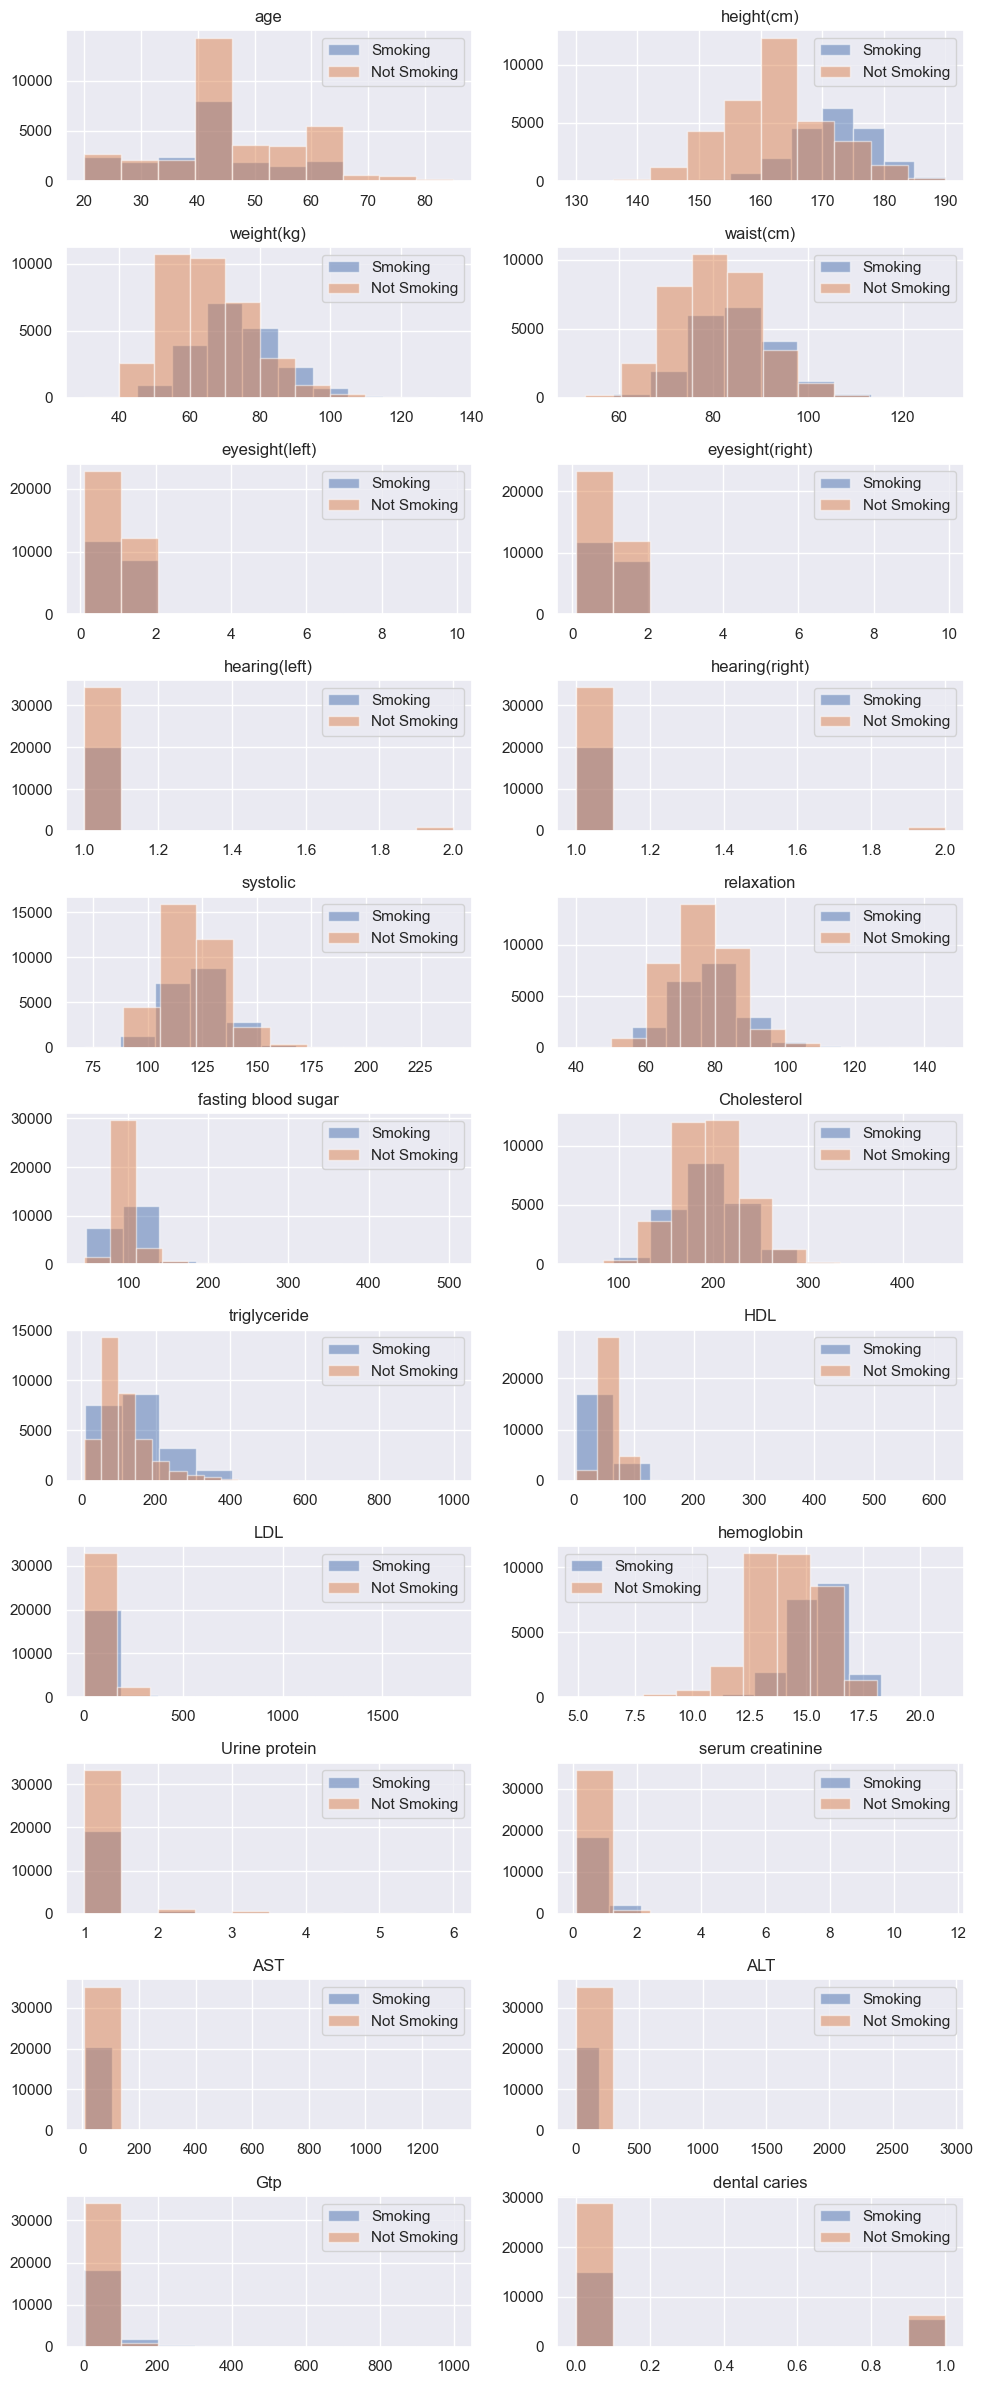

In [13]:
# Plotting graphs
c = 0
fig, axes = plt.subplots(11, 2, figsize=(10, 24))

for i in range(11):
    for j in range(2):       
        axes[i,j].hist(df_smoke[df_smoke.columns[c]].loc[df_smoke['smoking']==1], alpha=.5)
        axes[i,j].hist(df_smoke[df_smoke.columns[c]].loc[df_smoke['smoking']==0], alpha=.5)
        axes[i,j].set_title(f'{df_smoke.columns[c]}')
        axes[i,j].legend(['Smoking', 'Not Smoking'])
        c += 1
plt.tight_layout();

## Multicollinearity

Multicollinearity analysis, is a statistical technique used to assess the degree of correlation or linear dependence between predictor variables in a regression model. It examines the relationships among the independent variables to determine if there is a high degree of correlation between them.

One of the most common ways to observe multicollinearity analysis is through the correlation matrix. It displays the correlations between all combinations of independent variables in a dataset.

Correlations close to 1 or -1 indicate a perfect positive or negative linear relationship between the variables, respectively. This can be a sign of multicollinearity.

The matrix considers the correlation between the variables contained in the column and the corresponding index. The values on the main diagonal will always be 1 because it represents the correlation between the same set of data.

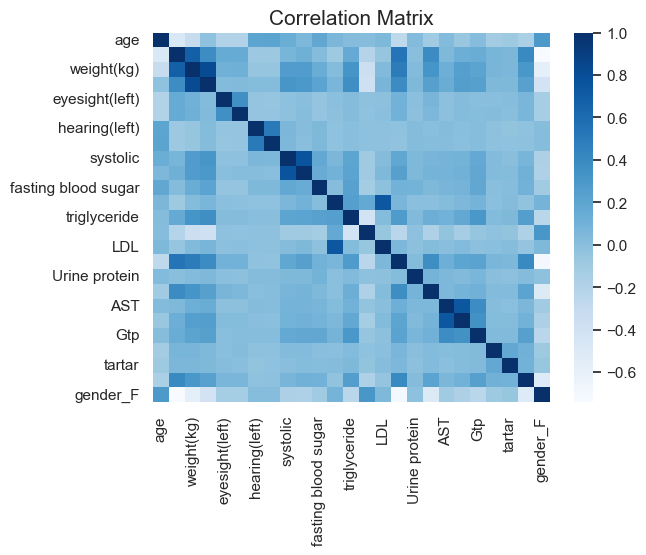

In [14]:
# Plotting the correlation matrix
sns.heatmap(df_smoke.corr(), cmap="Blues")
plt.title('Correlation Matrix', size=15);

There are no columns with high correlation among themselves.

## Applying the model

Since the dataset does not have any missing values, outliers (as observed from the histograms), and there are no issues of multicollinearity, the models are ready to be trained and fitted.

In [15]:
# Splitting into depdendent and predictor variables
y = df_smoke['smoking'].values
X = df_smoke.drop('smoking', 1).values

In [16]:
# Creating and fitting the Logistic Regression Model
logit_model = sm.Logit(y, sm.add_constant(X))
logit_model_fit = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.472327
         Iterations 7


In [17]:
# Model summary
logit_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                55692
Model:                          Logit   Df Residuals:                    55667
Method:                           MLE   Df Model:                           24
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.2816
Time:                        15:03:07   Log-Likelihood:                -26305.
converged:                       True   LL-Null:                       -36617.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8516      0.455     -8.474      0.000      -4.742      -2.961
x1            -0.0002      0.001     -0.158      0.875      -0.002       0.002
x2             0.0225      0.002     10.117      0.000       0.018       0.027
x3            -0.0103      0.002     -4.776      0.000      -0.015      -0.006
x4            -0.0012      0.003     -0.465      0.642      -0.006       0.004
x5            -0.0196      0.023     -0.870      0.384      -0.064       0.025
x6            -0.0103      0.023     -0.444      0.657      -0.056       0.035
x7            -0.2188      0.081     -2.688      0.007      -0.378      -0.059
x8             0.0213      0.080      0.264      0.792      -0.136       0.179
x9            -0.0144      0.001    -11.401      0.000      -0.017      -0.012
x10            0.0097      0.002      5.604      0.000       0.006       0.013
x11            0.0035      0.001      6.367      0.000       0.002       0.005
x12           -0.0024      0.001     -4.619      0.000      -0.003      -0.001
x13            0.0047      0.000     23.358      0.000       0.004       0.005
x14            0.0021      0.001      2.105      0.035       0.000       0.004
x15           -0.0001      0.000     -0.350      0.726      -0.001       0.001
x16            0.1390      0.011     12.745      0.000       0.118       0.160
x17            0.0117      0.027      0.439      0.660      -0.041       0.064
x18           -0.8690      0.067    -12.949      0.000      -1.000      -0.737
x19           -0.0011      0.001     -1.050      0.294      -0.003       0.001
x20           -0.0054      0.001     -6.835      0.000      -0.007      -0.004
x21            0.0073      0.000     22.203      0.000       0.007       0.008
x22            0.3163      0.026     12.285      0.000       0.266       0.367
x23            0.3376      0.022     15.472      0.000       0.295       0.380
x24           -2.9168      0.051    -56.774      0.000      -3.017      -2.816
==============================================================================
"""

As we can observe from the outputs of the trained Logistic Regression model, there are p-values greater than 0.05, indicating that these coefficients are not statistically significant and may introduce noise to the data.

One way to obtain a model without these coefficients is by using the stepwise function, which involves the gradual removal of statistically non-significant coefficients (considering a significance level of 5%).

However, the stepwise procedure will be done "manually," with successive removals of coefficients with p-values higher than 0.05 and training of new models until all coefficients become significant.

In [18]:
# Creating a new DataFrame
df_smoke_copy = df_smoke.copy()

In [19]:
# Colecting all the p values (except for the intercept)
p_vals = logit_model_fit.pvalues[1:]

In [20]:
# Creating a loop that will be repeated as long as there are non-significant coefficients in the model
while len(p_vals[p_vals>0.05]) > 0:
    
    # Getting coefficients with p-val > 0.5
    to_delete_columns = df_smoke_copy.columns[np.where(p_vals > 0.05)[0]]
    df_smoke_copy = df_smoke_copy.drop(to_delete_columns, 1)
    print(f'deleted columns: {to_delete_columns}')
    
    # Splitting dependent and predictor variables
    y = df_smoke_copy['smoking'].values
    X = df_smoke_copy.drop('smoking', 1).values
    
    # Creating and adjusting the model
    logit_model = sm.Logit(y, sm.add_constant(X))
    logit_model_fit = logit_model.fit()
    p_vals = logit_model_fit.pvalues[1:]
    

deleted columns: Index(['age', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
       'hearing(right)', 'LDL', 'Urine protein', 'AST'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.472354
         Iterations 7


In [21]:
# Model summary
logit_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                55692
Model:                          Logit   Df Residuals:                    55675
Method:                           MLE   Df Model:                           16
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.2816
Time:                        15:03:18   Log-Likelihood:                -26306.
converged:                       True   LL-Null:                       -36617.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9977      0.386    -10.353      0.000      -4.755      -3.241
x1             0.0228      0.002     11.230      0.000       0.019       0.027
x2            -0.0110      0.001     -8.654      0.000      -0.013      -0.008
x3            -0.2112      0.070     -3.010      0.003      -0.349      -0.074
x4            -0.0144      0.001    -11.505      0.000      -0.017      -0.012
x5             0.0096      0.002      5.592      0.000       0.006       0.013
x6             0.0035      0.001      6.556      0.000       0.002       0.005
x7            -0.0026      0.000     -7.857      0.000      -0.003      -0.002
x8             0.0048      0.000     25.587      0.000       0.004       0.005
x9             0.0022      0.001      2.425      0.015       0.000       0.004
x10            0.1397      0.011     13.013      0.000       0.119       0.161
x11           -0.8689      0.067    -13.024      0.000      -1.000      -0.738
x12           -0.0060      0.001    -10.617      0.000      -0.007      -0.005
x13            0.0073      0.000     22.326      0.000       0.007       0.008
x14            0.3175      0.026     12.389      0.000       0.267       0.368
x15            0.3379      0.022     15.509      0.000       0.295       0.381
x16           -2.9108      0.051    -57.118      0.000      -3.011      -2.811
==============================================================================
"""

The final model has undergone a significant reduction in size, with the number of coefficients decreasing from 24 to 16. This streamlined model is now ready for making predictions.

## Interpreting the Outputs

In the context of the problem, a loglikelihood of -26306 for a dataset consisting of 55692 records indicates that the model achieved a reasonable fit to the data.

However, in order to effectively classify the data, it is necessary to establish a cutoff point. The model provides probabilities for a specific event occurring in each record, specifically the likelihood of a person being a smoker based on their bodily characteristics.

For this analysis, a cutoff point of 0.5 has been selected. This means that if the obtained probability exceeds 0.5, the record will be classified as indicating the presence of smoking through bio-signals.

In [22]:
# Predicting (cutoff 0.5)
df_smoke['smoke_pred'] = np.where(logit_model_fit.predict() > 0.5, 1, 0)

In [23]:
# Creating the Confusion Matrix
conf_mat = pd.DataFrame(index=[1,0], columns=[1,0])
for i in conf_mat.index:
    for j in conf_mat.columns:
        conf_mat[j].loc[i] = int(len(df_smoke.loc[(df_smoke['smoking']==j)&(df_smoke['smoke_pred']==i)]))

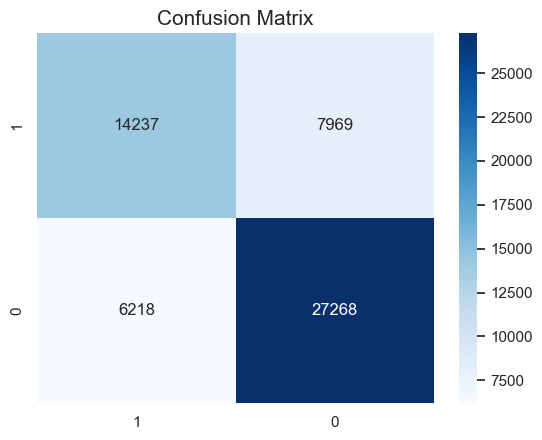

In [24]:
# Plotting the confusion Matrix
sns.heatmap(conf_mat.astype(int), cmap="Blues", annot=True, fmt='g')
plt.title('Confusion Matrix', size=15);

The Confusion Matrix indicates:

- True positives (TP): 14237 - The number of samples correctly classified as positive (smoking).

- False negatives (FN): 6218 - The number of samples incorrectly classified as negative (not smoking) when they are actually positive (smoking).

- False positives (FP): 7969 - The number of samples incorrectly classified as positive (smoking) when they are actually negative (not smoking).

- True negatives (TN): 27268 - The number of samples correctly classified as negative (not smoking).

In [25]:
# Calculating accuracy
accuracy = (conf_mat[0].loc[0] + conf_mat[1].loc[1])/conf_mat.sum().sum()
accuracy

0.7452596423184659

In [26]:
# Calculating precision
precision = conf_mat[1].loc[1]/conf_mat.sum(1)[1]
precision

0.6411330271097901

In [27]:
# Calculating sensitivity
recall = conf_mat[1].loc[1]/conf_mat.sum(0)[1]
recall

0.6960156440967978

In [28]:
# Calculating F1 Score
f1_score = (precision * recall * 2) / (precision + recall)
f1_score

0.6674480204402147

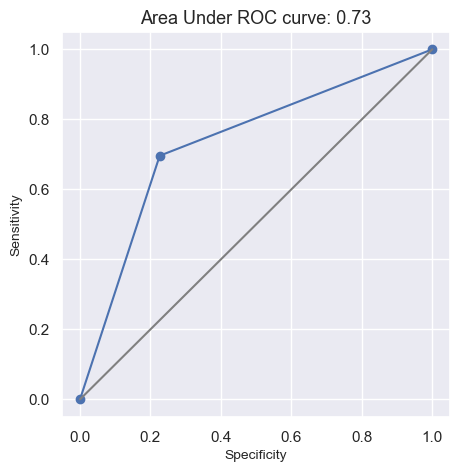

In [29]:
# ROC curve
fpr, tpr, thresholds = roc_curve(df_smoke['smoking'],df_smoke['smoke_pred'])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,5))
plt.plot(fpr,tpr, '-o')
plt.plot(fpr,fpr, color='gray')
plt.title(f"Area Under ROC curve: {round(roc_auc,2)}", fontsize=13)
plt.xlabel("Specificity", fontsize=10)
plt.ylabel("Sensitivity", fontsize=10)
plt.show()

The overall accuracy of 0.74 indicates that 74% of the records were correctly classified. The model correctly classified 70% of the smoking cases and 77% of the non-smoking cases, indicating that there is not a significant discrepancy in the model's classifications between "event" and "non-event".

An area below the Receiver Operating Characteristic (ROC) curve of 0.73 indicates that the model has a reasonable ability to distinguish between the positive and negative classes. The larger the area under the ROC curve, the better the model's performance in classification. An area of 0.73 suggests a moderately good performance, but there may be room for improvement.